In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error 
from math import sqrt
import math

/Users/basillatif/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Sources Used:
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [2]:
pwd()

'/Users/basillatif/Desktop/AirBnb Project'

In [54]:
airbnb_df = pd.read_csv("/Users/basillatif/Desktop/AirBnb Project/aribnb_final_clean.csv")

In [55]:
airbnb_df.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
0,1,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",122,500,240,3,25,42505.0,165,2
1,2,House,Entire home/apt,6,1.0,3.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",168,0,100,6,0,43394.0,0,6
2,3,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79,480,87,1,0,43680.0,276,21
3,4,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",140,338,100,1,0,43680.0,346,19
4,5,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,100,75,1,25,43554.5,0,0


In [56]:
target = pd.DataFrame(airbnb_df, columns=["price"])

In [57]:
#target

In [58]:
airbnb_df.property_type.unique()

array(['Apartment', 'House', 'Other'], dtype=object)

In [59]:
airbnb_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [60]:
room_dummy = pd.get_dummies(airbnb_df['room_type'])
room_dummy

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
44460,0,1,0
44461,0,1,0
44462,0,1,0
44463,1,0,0


In [61]:
dummy_prop = pd.get_dummies(airbnb_df['property_type'])
dummy_prop

,Apartment,House,Other
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
44460,0,1,0
44461,1,0,0
44462,0,1,0
44463,1,0,0


In [134]:
amenities = pd.read_csv('airbnb_amenities.csv')
amenities = amenities.drop(["price", "amenities"], axis = 1)
amenities.dtypes
#len(amenities.columns)

id                          int64
check_in_24h                int64
air_conditioning            int64
security                    int64
tv                          int64
bbq_oven                    int64
kid_friendly                int64
balcony_patio               int64
bar                         int64
exercise                    int64
beach                       int64
beds                        int64
bidet                       int64
breakfast                   int64
pets                        int64
cleaning_before_checkout    int64
oven                        int64
coffee_maker                int64
dining_area                 int64
dishes_and_silver           int64
dishwasher                  int64
parking                     int64
washer_dryer                int64
ev_charger                  int64
elevator                    int64
ensuite                     int64
internet                    int64
firm_mattress               int64
kitchen                     int64
games         

In [63]:
airbnb_df = pd.concat([airbnb_df, dummy_prop, room_dummy], axis = 1)
#airbnb_df = pd.concat([airbnb_df, dummy_prop, room_dummy, amenities], axis = 1)

airbnb_df

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,...,extra_people,last_review,availability_365,number_of_reviews,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,1,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",122,500,...,25,42505.0,165,2,1,0,0,1,0,0
1,2,House,Entire home/apt,6,1.0,3.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",168,0,...,0,43394.0,0,6,0,1,0,1,0,0
2,3,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79,480,...,0,43680.0,276,21,1,0,0,0,1,0
3,4,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",140,338,...,0,43680.0,346,19,1,0,0,0,1,0
4,5,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,100,...,25,43554.5,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44460,45049,House,Private room,1,1.0,0.0,1,"{TV,Wifi,""Air conditioning"",Heating,""Smoke det...",89,338,...,0,43554.5,173,0,0,1,0,0,1,0
44461,45050,Apartment,Private room,2,1.0,1.0,1,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",90,338,...,0,43554.5,365,0,1,0,0,0,1,0
44462,45051,House,Private room,2,1.0,1.0,2,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",47,338,...,0,43554.5,347,0,0,1,0,0,1,0
44463,45052,Apartment,Entire home/apt,3,1.0,1.0,1,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",105,500,...,0,43554.5,253,0,1,0,0,1,0,0


**Now, I will build a model using the 2 most correlated variables with price: bathrooms and security deposit

In [64]:
bath = airbnb_df['bathrooms']
sec = airbnb_df['security_deposit']

In [65]:
airbnb_df = airbnb_df.drop(["property_type", "room_type", "amenities" ], axis = 1)
airbnb_df.head()

,id,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,1,6,2.0,2.0,3,122,500,240,3,25,42505.0,165,2,1,0,0,1,0,0
1,2,6,1.0,3.0,3,168,0,100,6,0,43394.0,0,6,0,1,0,1,0,0
2,3,1,1.5,1.0,1,79,480,87,1,0,43680.0,276,21,1,0,0,0,1,0
3,4,1,1.0,1.0,1,140,338,100,1,0,43680.0,346,19,1,0,0,0,1,0
4,5,2,1.0,1.0,1,80,100,75,1,25,43554.5,0,0,1,0,0,1,0,0


* Model for bath predicting price

In [66]:
#model = sm.OLS(target, bath).fit()
#bath = sm.add_constant(bath) ## let's add an intercept (beta_0) to our model
#predictions = model.predict(bath) # make the predictions by the model

# Print out the statistics
#model.summary()

* Model for security deposit predicting price

In [67]:
model = sm.OLS(target, sec).fit()
predictions = model.predict(sec) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.304
Model:                            OLS   Adj. R-squared (uncentered):              0.304
Method:                 Least Squares   F-statistic:                          1.941e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                        18:11:26   Log-Likelihood:                     -3.4143e+05
No. Observations:               44465   AIC:                                  6.829e+05
Df Residuals:                   44464   BIC:                                  6.829e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
security_deposit     0.1563      0.001    139.320      0.000       0.154       0.158
==============================================================================
Omnibus:                    75140.843   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        399587989.994
Skew:                          10.865   Prob(JB):                         0.00
Kurtosis:                     466.903   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Now running the same model with 2 variables

In [68]:
X = airbnb_df[['bathrooms', 'security_deposit']]
model = sm.OLS(target, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                          2.003e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                        18:11:30   Log-Likelihood:                     -3.3520e+05
No. Observations:               44465   AIC:                                  6.704e+05
Df Residuals:                   44463   BIC:                                  6.704e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bathrooms          154.7196      1.290    119.910      0.000     152.191     157.249
security_deposit     0.1193      0.001    116.700      0.000       0.117       0.121
==============================================================================
Omnibus:                    84906.646   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        397431936.776
Skew:                          14.507   Prob(JB):                         0.00
Kurtosis:                     465.247   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Linear Regression in Sklearn

In [69]:
#Data frame with log transformed price column
price_t = pd.read_csv('price_transformed.csv')
price_t

,price_transformed
0,4.812184
1,5.129899
2,4.382027
3,4.948760
4,4.394449
...,...
44460,4.499810
44461,4.510860
44462,3.871201
44463,4.663439


In [120]:
airbnb_df.head()

,id,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,1,6,2.0,2.0,3,122,500,240,3,25,42505.0,165,2,1,0,0,1,0,0
1,2,6,1.0,3.0,3,168,0,100,6,0,43394.0,0,6,0,1,0,1,0,0
2,3,1,1.5,1.0,1,79,480,87,1,0,43680.0,276,21,1,0,0,0,1,0
3,4,1,1.0,1.0,1,140,338,100,1,0,43680.0,346,19,1,0,0,0,1,0
4,5,2,1.0,1.0,1,80,100,75,1,25,43554.5,0,0,1,0,0,1,0,0


In [71]:
#airbnb_df = airbnb_df.drop(["property_type", "room_type"], axis = 1)
#airbnb_df.head()

In [133]:
#airbnb_df = airbnb_df.merge(amenities, left_on='id', right_on='id')
#airbnb_df = pd.concat([airbnb_df, amenities.reindex(airbnb_df.index)], axis=1)
#airbnb_df.head()
airbnb_df

,id,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,1,6,2.0,2.0,3,122,500,240,3,25,42505.0,165,2,1,0,0,1,0,0
1,2,6,1.0,3.0,3,168,0,100,6,0,43394.0,0,6,0,1,0,1,0,0
2,3,1,1.5,1.0,1,79,480,87,1,0,43680.0,276,21,1,0,0,0,1,0
3,4,1,1.0,1.0,1,140,338,100,1,0,43680.0,346,19,1,0,0,0,1,0
4,5,2,1.0,1.0,1,80,100,75,1,25,43554.5,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44460,45049,1,1.0,0.0,1,89,338,78,1,0,43554.5,173,0,0,1,0,0,1,0
44461,45050,2,1.0,1.0,1,90,338,25,1,0,43554.5,365,0,1,0,0,0,1,0
44462,45051,2,1.0,1.0,2,47,338,78,1,0,43554.5,347,0,0,1,0,0,1,0
44463,45052,3,1.0,1.0,1,105,500,115,1,0,43554.5,253,0,1,0,0,1,0,0


In [129]:
#drop the non numeric columns and the price variable because that is what we are predicting 
abb_lr = airbnb_df
#abb_lr = abb_lr.drop(["id","property_type","room_type", "amenities", "price"], axis=1)
abb_lr.shape

(44465, 19)

In [130]:
lm = linear_model.LinearRegression()
model = lm.fit(abb_lr,price_t)

In [131]:
#printing the predictions
predictions = lm.predict(abb_lr)
#airbnb_df = pd.concat([airbnb_df, dummy_prop, room_dummy], axis = 1)
#df = pd.concat([predictions, price_t], axis = 1)
print(predictions)

[[5.53163322]
 [5.31020174]
 [4.29702655]
 ...
 [4.26028389]
 [4.95070239]
 [4.36060424]]


In [87]:
lm.score(abb_lr, price_t)

0.7354751336360952

Text(0.5, 1.0, 'Predicted (Orange) Price vs Actual (Blue) Price ')

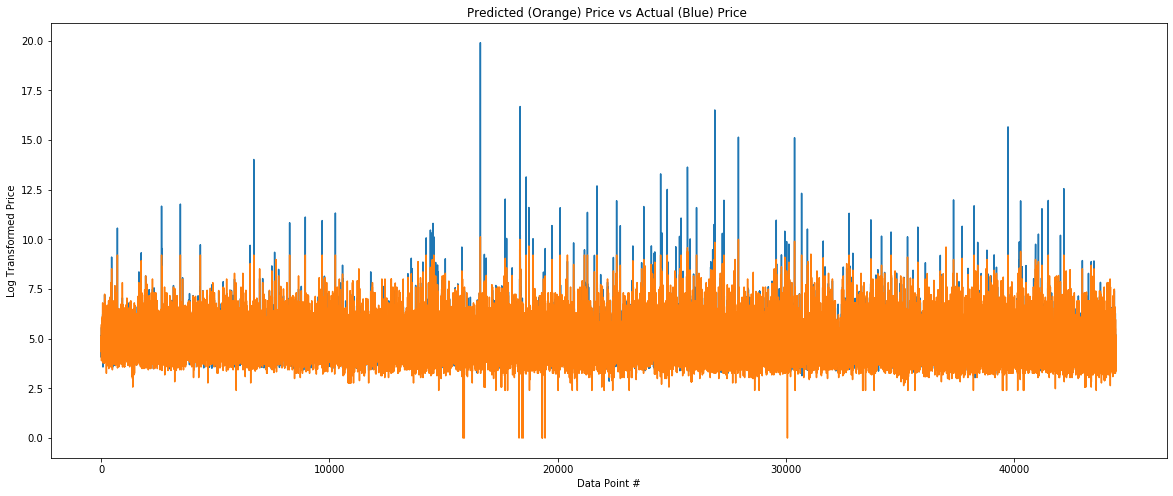

In [149]:
plt.figure(figsize=(20,8))
plt.plot(predictions)
plt.plot(price_t)
plt.xlabel('Data Point #')
plt.ylabel('Log Transformed Price')
plt.title('Predicted (Orange) Price vs Actual (Blue) Price ')

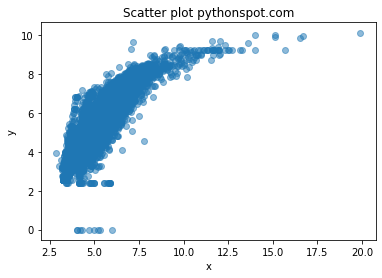

In [150]:
plt.scatter(predictions, price_t, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


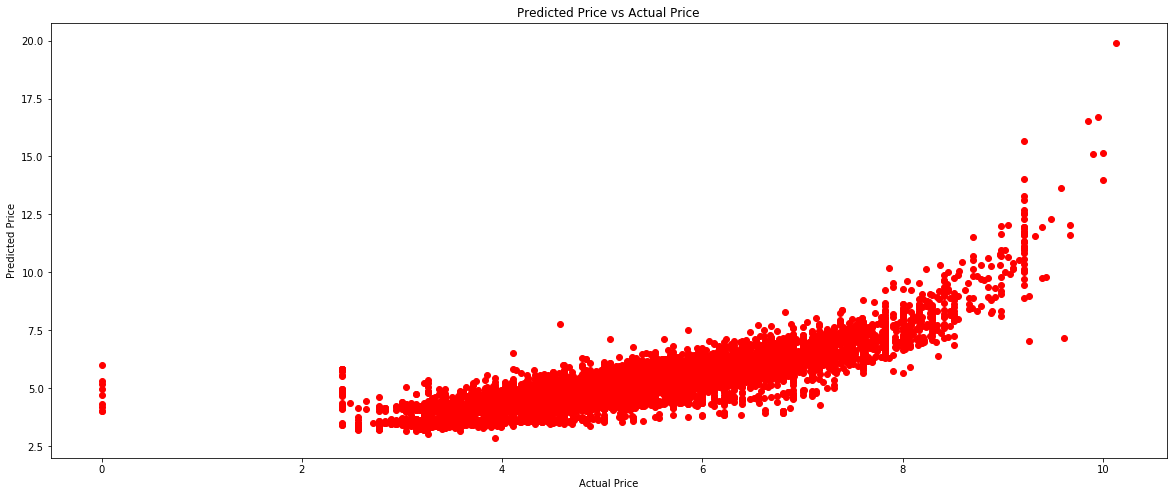

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.scatter(price_t, predictions, color = "red")
plt.title('Predicted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [132]:
lm.coef_

array([[-8.00106353e-07,  5.82952203e-02,  1.41867391e-02,
         1.42971901e-01, -3.41157665e-02,  5.31498667e-04,
        -2.85822134e-05,  1.59672625e-03,  1.89750891e-04,
         1.07183852e-03, -6.80798898e-05,  2.86555474e-04,
        -4.81105629e-04, -1.15590622e-02, -4.10174742e-02,
         5.25765364e-02,  5.44399002e-01,  3.41883631e-02,
        -5.78587365e-01]])

In [88]:
lm.intercept_

array([6.82333781])

* Multiple Linear Regression 
Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [89]:
X = abb_lr[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'availability_365', 'number_of_reviews', 'Apartment', 'House', 'Other', 'Apartment', 'House', 'Other', 'Entire home/apt', 'Private room', 'Shared room']].values
y = airbnb_df['price'].values
#price_t = price_t.values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df

In [93]:
y_pred = regressor.predict(X_test)

In [94]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [95]:
df1 = df.head(25)
df1

,Actual,Predicted
0,200,331.027554
1,130,113.003737
2,25,-56.653245
3,65,11.560334
4,135,95.798537
5,75,42.723176
6,197,302.892349
7,10,21.945979
8,50,21.228211
9,110,42.944210


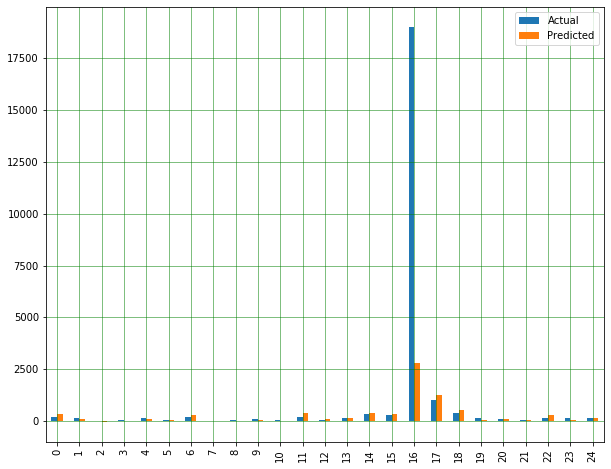

In [96]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 137.60650862398688
Mean Squared Error: 219427.65493252996
Root Mean Squared Error: 468.4310567549188


* Random Forest:
https://medium.com/ml2vec/data-analysis-on-the-airbnb-dataset-e0be9254eeb9

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
# l_X, l_y = abb_lr, airbnb_df['price'];
# l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

# rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1024);
# rf_classifier.fit(l_X_train, l_y_train)

# l_y_pred = rf_classifier.predict(l_X_test);
# l_y_pred_tr = rf_classifier.predict(l_X_train);
# print(l_y_pred)
# print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))
# #print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

In [100]:
# df = pd.DataFrame({'Actual': y_test, 'Predicted': l_y_pred})

In [101]:
# df1 = df.head(25)

In [102]:
# df1.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [118]:
abb_lr = abb_lr.drop(['price'], axis = 1)
#amenities = amenities.drop(["price", "amenities"], axis = 1)

abb_lr.head()

,id,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,1,6,2.0,2.0,3,500,240,3,25,42505.0,165,2,1,0,0,1,0,0
1,2,6,1.0,3.0,3,0,100,6,0,43394.0,0,6,0,1,0,1,0,0
2,3,1,1.5,1.0,1,480,87,1,0,43680.0,276,21,1,0,0,0,1,0
3,4,1,1.0,1.0,1,338,100,1,0,43680.0,346,19,1,0,0,0,1,0
4,5,2,1.0,1.0,1,100,75,1,25,43554.5,0,0,1,0,0,1,0,0


In [119]:
l_X, l_y = abb_lr, np.ravel(price_t);
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(l_y_test, l_y_pred))  

0.41972797555800473
Mean Absolute Error: 0.29270015119679893


In [138]:
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [139]:
pscore = clf.score(l_y_test, l_y_pred)
#pscore_train = metrics.accuracy_score(y_train, pred_train)
print(pscore)

NameError: name 'clf' is not defined

In [140]:
print(l_y_test)

[4.33073334 5.01063529 5.70711026 ... 4.33073334 4.60517019 3.93182563]


In [112]:
print(l_y_pred)

[4.33073334 5.01063529 5.70711635 ... 4.33073334 4.60517019 3.93182563]


In [110]:
price_t.mean()

price_transformed    4.811251
dtype: float64